# 3.Data Preprocessing

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Step 1: Load dataset
df = pd.read_csv("Before-PreProcess.csv")

# Step 2: Identify column types
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand                     2466 non-null   object 
 1   Price                     2466 non-null   float64
 2   Processor_Type            2461 non-null   object 
 3   SSD_Capacity              2266 non-null   float64
 4   RAM                       2267 non-null   float64
 5   Graphics_Card             2454 non-null   object 
 6   Capacity                  1558 non-null   float64
 7   Operating_System          2453 non-null   object 
 8   Graphics_Memory_Type      2424 non-null   object 
 9   Graphics_Card_Type        2430 non-null   object 
 10  Warranty_Type             2457 non-null   object 
 11  RAM_Type                  2324 non-null   object 
 12  Processor_Core_Count      2420 non-null   float64
 13  Processor_Generation      2408 non-null   float64
 14  Processo

## 3.1 Handling Missing Values

In [35]:
# Step 3: Handle missing values safely

# Fill numerical columns with median
for col in numerical_cols:
    if df[col].isnull().any():
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)  # Avoid inplace to prevent weird behavior

# Fill categorical columns with mode
for col in categorical_cols:
    if df[col].isnull().any():
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)  # Also avoid inplace

print("✅ Missing values filled using median (numerical) and mode (categorical)")


✅ Missing values filled using median (numerical) and mode (categorical)


In [37]:
df.to_csv("Midprocess.csv",index=False)

In [38]:

# Identify categorical columns (assuming they are of object type)
categorical_cols = df.select_dtypes(include=['object']).columns

# Loop through each categorical column and get unique values and counts
for col in categorical_cols:
    unique_values = df[col].unique()  # Get unique values
    unique_count = df[col].nunique()  # Get count of unique values
    print(f"Column: {col}")
    print(f"Unique Count: {unique_count}")
    print(f"Unique Values: {unique_values}")
    print("-" * 50)


Column: Brand
Unique Count: 52
Unique Values: ['XASER' 'DMC' 'Zeiron' 'jetucuzal' 'Life Teknoloji' 'IZOLY' 'TURBOX'
 'Super' 'RAMTECH' 'Gamepage' 'Apple' 'GAMELİNE' 'MSI' 'METSA' 'PCDEPO'
 'Quantum Gaming' 'Canar' 'Gigabyte' 'ROGAME' 'LENOVO' 'EFS TEKNOLOJİ'
 'HP' 'OEM' 'ASUS' 'OXpower' 'ARTITEKNİKPC' 'TOPLAMA' 'Güneysu Gaming'
 'CASPER' 'UCARTECH' 'Technopc' 'DAGMOR' 'WARBOX' 'Avantron' 'Revenge'
 'ColdPower' 'SECLIFE' 'TRİNİTY' 'Zetta' 'Corsair' 'RaXius'
 'Oksid Bilişim Teknoloji' 'Tiwox' 'Jedi' 'Dell' 'Quadro' 'Rexdragon'
 'Grundig' 'Redrock' 'Gaming Game' 'ACER' 'Tiranozor']
--------------------------------------------------
Column: Processor_Type
Unique Count: 13
Unique Values: ['Intel Core i5' 'Intel Core i7' 'AMD' 'Intel Core i3' 'AMD Ryzen 5'
 'AMD Ryzen 9' 'M2' 'Apple M1' 'Intel Pentium' 'AMD Ryzen 7' 'Intel Xeon'
 'Intel Core i9' 'AMD Ryzen 3']
--------------------------------------------------
Column: Graphics_Card
Unique Count: 49
Unique Values: ['AMD Radeon RX 550' 'Nvidia

## 3.2 Label Encoding

In [39]:
# Step 1: Load your dataset
df = pd.read_csv("Midprocess.csv")

In [40]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Copy the dataframe to avoid modifying the original
df_encoded = df.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of all categorical columns (except Price)
categorical_cols = [
    'Brand', 'Processor_Type', 'Graphics_Card', 'Operating_System', 
    'Graphics_Memory_Type', 'Graphics_Card_Type', 'Warranty_Type', 
    'RAM_Type', 'Processor_Model', 'Usage_Purpose', 'Connections'
]

# Apply Label Encoding to each categorical column
for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Now df_encoded has all categorical columns Label Encoded


In [41]:
df_encoded

,Brand,Price,Processor_Type,SSD_Capacity,RAM,Graphics_Card,Capacity,Operating_System,Graphics_Memory_Type,Graphics_Card_Type,...,RAM_Type,Processor_Core_Count,Processor_Generation,Processor_Model,Usage_Purpose,Graphics_Card_Memory,Base_Processor_Speed_GHz,Connections,Screen_Size,Expandable_Max_Memory
0,48,13716.90,7,512.0,16.0,5,512.0,0,5,0,...,1,4.0,3.0,36,3,4.0,1.8,7,23.8,64.0
1,10,13678.00,7,512.0,16.0,42,1024.0,4,2,0,...,1,4.0,3.0,80,1,4.0,3.2,5,24.0,64.0
2,48,12857.74,7,512.0,16.0,9,512.0,0,5,0,...,1,4.0,4.0,46,3,4.0,1.8,7,23.8,64.0
3,10,20799.00,7,256.0,32.0,9,256.0,4,5,0,...,2,6.0,12.0,75,1,8.0,2.9,5,24.0,64.0
4,48,12834.62,7,512.0,16.0,5,512.0,0,5,0,...,1,4.0,4.0,46,3,4.0,1.8,7,23.8,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,19,42606.03,8,1024.0,64.0,24,1024.0,4,2,0,...,2,24.0,13.0,22,3,4.0,1.5,7,23.8,64.0
2462,19,51946.97,8,2048.0,64.0,25,1024.0,4,7,0,...,2,24.0,13.0,22,3,4.0,1.5,7,23.8,64.0
2463,19,43954.05,8,4096.0,12.0,11,1024.0,4,9,1,...,2,24.0,13.0,22,3,2.0,1.5,7,23.8,64.0
2464,19,43963.48,8,2048.0,48.0,24,1024.0,4,2,0,...,2,24.0,13.0,22,3,4.0,1.5,7,23.8,64.0


In [42]:
df_encoded.isnull().sum()

Brand                       0
Price                       0
Processor_Type              0
SSD_Capacity                0
RAM                         0
Graphics_Card               0
Capacity                    0
Operating_System            0
Graphics_Memory_Type        0
Graphics_Card_Type          0
Warranty_Type               0
RAM_Type                    0
Processor_Core_Count        0
Processor_Generation        0
Processor_Model             0
Usage_Purpose               0
Graphics_Card_Memory        0
Base_Processor_Speed_GHz    0
Connections                 0
Screen_Size                 0
Expandable_Max_Memory       0
dtype: int64

In [43]:
df_encoded.to_csv("TemporaryData.csv",index=False)

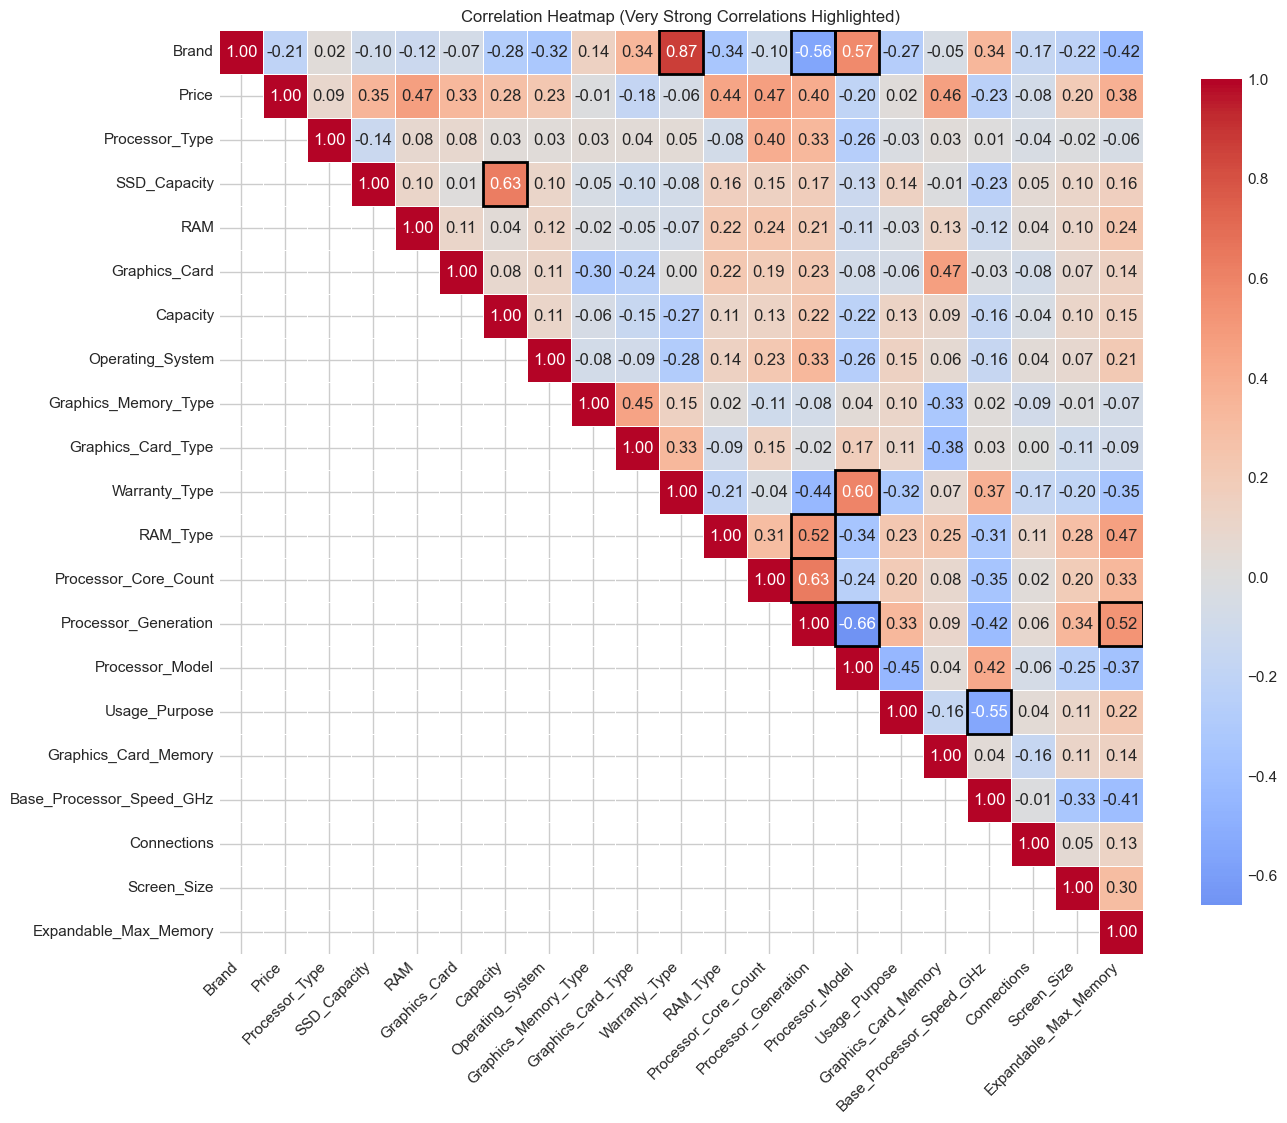


Very Strongly Correlated Feature Pairs (|ρ| > 0.5):
Brand ↔ Warranty_Type : ρ = 0.87
Brand ↔ Processor_Generation : ρ = -0.56
Brand ↔ Processor_Model : ρ = 0.57
SSD_Capacity ↔ Capacity : ρ = 0.63
Warranty_Type ↔ Processor_Model : ρ = 0.60
RAM_Type ↔ Processor_Generation : ρ = 0.52
Processor_Core_Count ↔ Processor_Generation : ρ = 0.63
Processor_Generation ↔ Processor_Model : ρ = -0.66
Processor_Generation ↔ Expandable_Max_Memory : ρ = 0.52
Usage_Purpose ↔ Base_Processor_Speed_GHz : ρ = -0.55

Dropping columns due to very strong correlation: {'Processor_Model', 'Capacity', 'Processor_Generation', 'Expandable_Max_Memory', 'Base_Processor_Speed_GHz', 'Warranty_Type'}


In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your DataFrame
df = pd.read_csv("TemporaryData.csv")

# Step 1: Correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Step 2: Identify very strong correlations
threshold = 0.5
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

very_strong_mask = (abs(upper) > threshold) & (abs(upper) < 1.0)

# Step 3: Create a mask to use with the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Step 4: Plot heatmap with annotations
plt.figure(figsize=(14, 12))
ax = sns.heatmap(
    corr_matrix,
    mask=~mask,  # Show only upper triangle
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": .8},
    center=0
)

# Step 5: Highlight "Very Strong" correlations with a circle or border
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if very_strong_mask.iloc[i, j]:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='black', lw=2))

plt.title("Correlation Heatmap (Very Strong Correlations Highlighted)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Step 6: Print and remove very strong pairs
very_strong_corrs = [
    (col1, col2, upper.loc[col1, col2])
    for col1 in upper.columns
    for col2 in upper.index
    if abs(upper.loc[col1, col2]) > threshold and abs(upper.loc[col1, col2]) < 1.0
]

print("\nVery Strongly Correlated Feature Pairs (|ρ| > 0.5):")
for col1, col2, corr_val in very_strong_corrs:
    print(f"{col1} ↔ {col2} : ρ = {corr_val:.2f}")

# Step 7: Drop one feature from each correlated pair
to_drop = set(col2 for col1, col2, _ in very_strong_corrs)
print(f"\nDropping columns due to very strong correlation: {to_drop}")
df_reduced = df.drop(columns=list(to_drop))


In [45]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 2466 non-null   int64  
 1   Price                 2466 non-null   float64
 2   Processor_Type        2466 non-null   int64  
 3   SSD_Capacity          2466 non-null   float64
 4   RAM                   2466 non-null   float64
 5   Graphics_Card         2466 non-null   int64  
 6   Operating_System      2466 non-null   int64  
 7   Graphics_Memory_Type  2466 non-null   int64  
 8   Graphics_Card_Type    2466 non-null   int64  
 9   RAM_Type              2466 non-null   int64  
 10  Processor_Core_Count  2466 non-null   float64
 11  Usage_Purpose         2466 non-null   int64  
 12  Graphics_Card_Memory  2466 non-null   float64
 13  Connections           2466 non-null   int64  
 14  Screen_Size           2466 non-null   float64
dtypes: float64(6), int64(

In [46]:
df_reduced.to_csv("After-Correlation.csv",index=False)

## 3.3 Checking Multicollinearity using VIF

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [48]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

# Load the standardized dataset
df_std = pd.read_csv('After-Correlation.csv')

# Display basic information
print("Dataset Shape:", df_std.shape)
print("\nFirst few rows of the standardized dataset:")
df_std.head()

Dataset Shape: (2466, 15)

First few rows of the standardized dataset:


,Brand,Price,Processor_Type,SSD_Capacity,RAM,Graphics_Card,Operating_System,Graphics_Memory_Type,Graphics_Card_Type,RAM_Type,Processor_Core_Count,Usage_Purpose,Graphics_Card_Memory,Connections,Screen_Size
0,48,13716.90,7,512.0,16.0,5,0,5,0,1,4.0,3,4.0,7,23.8
1,10,13678.00,7,512.0,16.0,42,4,2,0,1,4.0,1,4.0,5,24.0
2,48,12857.74,7,512.0,16.0,9,0,5,0,1,4.0,3,4.0,7,23.8
3,10,20799.00,7,256.0,32.0,9,4,5,0,2,6.0,1,8.0,5,24.0
4,48,12834.62,7,512.0,16.0,5,0,5,0,1,4.0,3,4.0,7,23.8


In [49]:
numeric_columns = []
categorical_columns = []

for col in df_std.columns:
    # Check if column contains mostly numerical data
    try:
        pd.to_numeric(df_std[col])
        numeric_columns.append(col)
    except:
        categorical_columns.append(col)

print("\nIdentified Numerical Columns:", len(numeric_columns))
print(numeric_columns)
print("\nIdentified Categorical Columns:", len(categorical_columns))
print(categorical_columns)

df_encoded = df_std.copy()


Identified Numerical Columns: 15
['Brand', 'Price', 'Processor_Type', 'SSD_Capacity', 'RAM', 'Graphics_Card', 'Operating_System', 'Graphics_Memory_Type', 'Graphics_Card_Type', 'RAM_Type', 'Processor_Core_Count', 'Usage_Purpose', 'Graphics_Card_Memory', 'Connections', 'Screen_Size']

Identified Categorical Columns: 0
[]



Features selected for VIF analysis:
['Brand', 'Processor_Type', 'SSD_Capacity', 'RAM', 'Graphics_Card', 'Operating_System', 'Graphics_Memory_Type', 'Graphics_Card_Type', 'RAM_Type', 'Processor_Core_Count', 'Usage_Purpose', 'Graphics_Card_Memory', 'Connections', 'Screen_Size']

Features after removing constants: 14

*** APPLYING ITERATIVE VIF ELIMINATION WITH THRESHOLD OF 10 ***

Starting iterative VIF elimination with 14 features

ITERATION 1
--------------------------------------------------------------------------------
VIF values for all features at iteration 1:
                 Feature         VIF
13           Screen_Size  161.620855
8               RAM_Type   58.771047
12           Connections   57.742071
10         Usage_Purpose   54.453853
1         Processor_Type   32.510382
11  Graphics_Card_Memory   12.038122
6   Graphics_Memory_Type    9.395403
9   Processor_Core_Count    8.659542
4          Graphics_Card    7.858196
3                    RAM    3.949180
7     Graphics_Card_

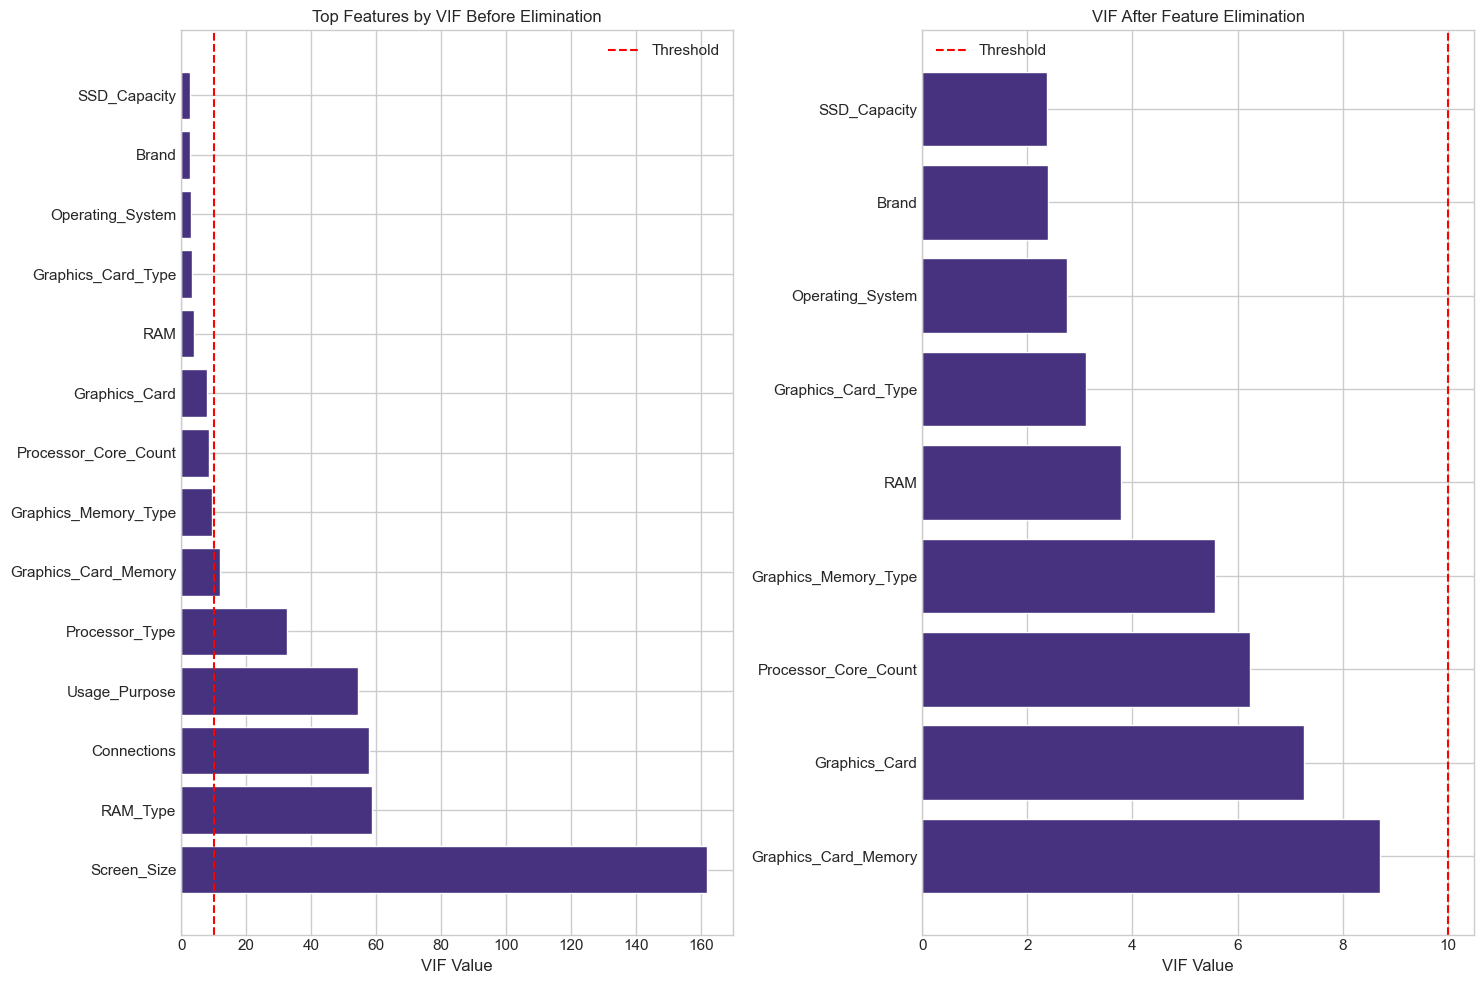

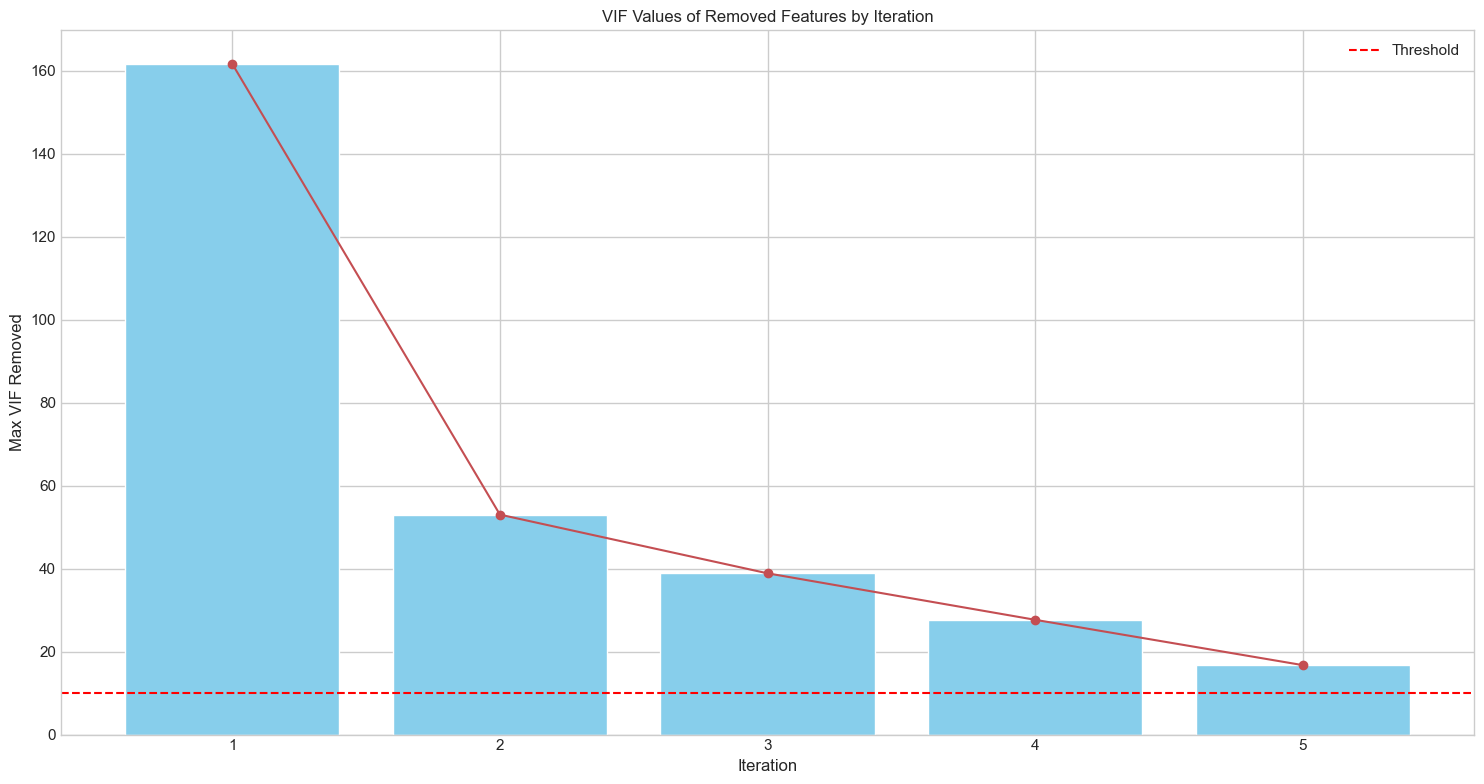

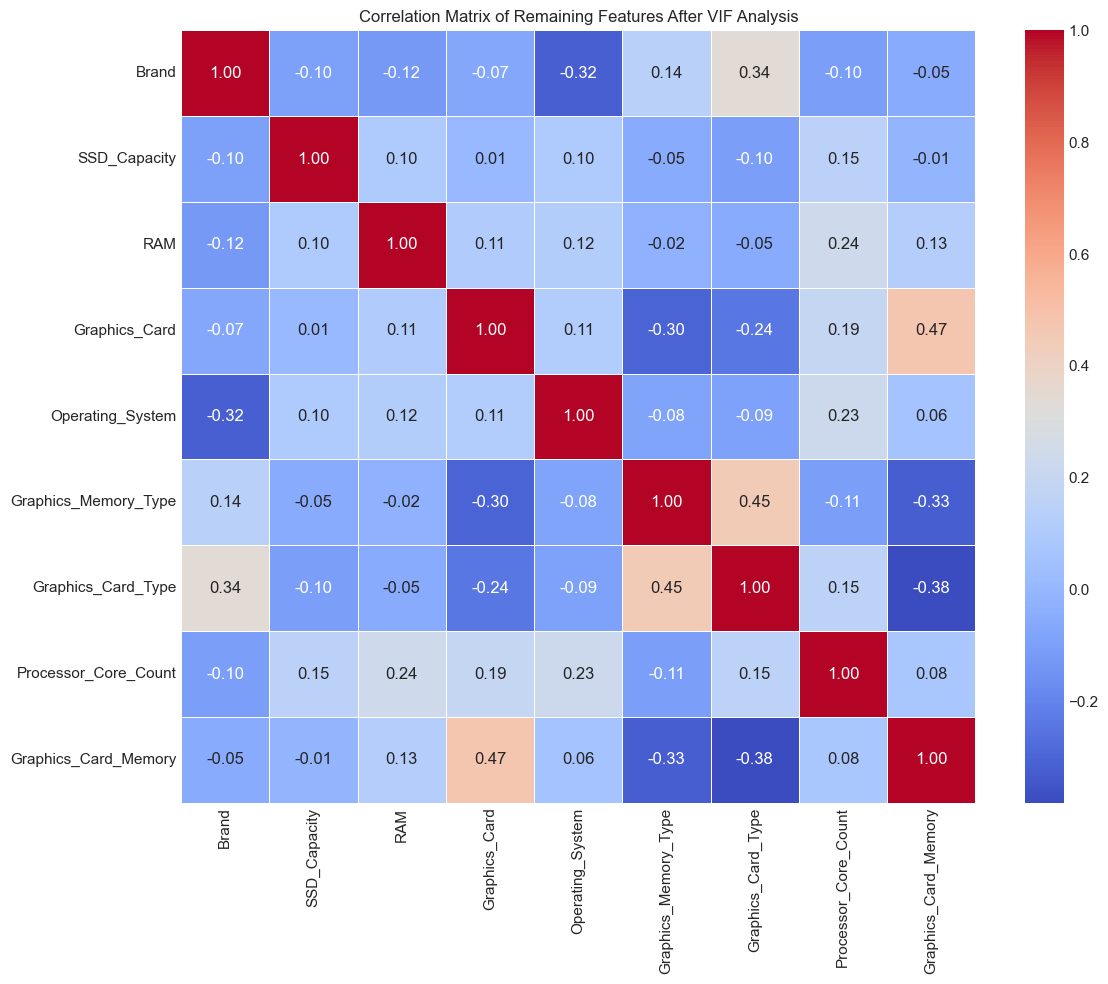


Recommended dataset sample (with target variable):
   Brand  SSD_Capacity   RAM  Graphics_Card  Operating_System  Graphics_Memory_Type  Graphics_Card_Type  Processor_Core_Count  Graphics_Card_Memory     Price
0     48         512.0  16.0              5                 0                     5                   0                   4.0                   4.0  13716.90
1     10         512.0  16.0             42                 4                     2                   0                   4.0                   4.0  13678.00
2     48         512.0  16.0              9                 0                     5                   0                   4.0                   4.0  12857.74
3     10         256.0  32.0              9                 4                     5                   0                   6.0                   8.0  20799.00
4     48         512.0  16.0              5                 0                     5                   0                   4.0                   4.0  12834.62


In [50]:
# Function to calculate VIF
def calculate_vif(df, features):
    """Calculate VIF for each feature in the dataframe"""
    vif_data = pd.DataFrame()
    vif_data["Feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(df[features].values, i) 
                      for i in range(len(features))]
    return vif_data.sort_values("VIF", ascending=False)

# Prepare features for VIF analysis
# Assuming 'Price' is the target variable, exclude it
target_variable = 'Price'
vif_features = [col for col in df_encoded.columns if col != target_variable]

print("\nFeatures selected for VIF analysis:")
print(vif_features)

# Remove features with perfect collinearity or constant values
cleaned_features = []
for col in vif_features:
    if df_encoded[col].nunique() > 1:  # Only keep features with variation
        cleaned_features.append(col)
    else:
        print(f"Removing {col} due to lack of variation")

print(f"\nFeatures after removing constants: {len(cleaned_features)}")

# Iterative VIF feature selection with detailed output
def iterative_vif_elimination_with_details(df, features, threshold=10.0, max_iterations=50):
    """
    Iteratively remove features with highest VIF and print VIF values at each iteration
    """
    current_features = features.copy()
    iteration = 0
    removed_features = []
    vif_histories = []
    
    print(f"\nStarting iterative VIF elimination with {len(current_features)} features")
    print("="*80)
    
    while iteration < max_iterations and len(current_features) > 1:
        iteration += 1
        print(f"\nITERATION {iteration}")
        print("-"*80)
        
        # Calculate VIF for current features
        vif = calculate_vif(df, current_features)
        vif_histories.append(vif.copy())
        
        # Print all VIF values for current iteration
        print(f"VIF values for all features at iteration {iteration}:")
        print(vif)
        
        # Get feature with highest VIF
        max_vif_feature = vif.loc[vif["VIF"].idxmax()]
        
        # Check if all features are below threshold
        if max_vif_feature["VIF"] <= threshold:
            print(f"\nAll features have VIF < {threshold}, stopping at iteration {iteration}")
            break
        
        # Remove feature with highest VIF
        feature_to_remove = max_vif_feature["Feature"]
        print(f"\nRemoving feature: {feature_to_remove} with VIF = {max_vif_feature['VIF']:.4f}")
        current_features.remove(feature_to_remove)
        removed_features.append((feature_to_remove, max_vif_feature["VIF"]))
        
        print(f"Remaining features: {len(current_features)}")
    
    # Calculate final VIF for the remaining features
    final_vif = calculate_vif(df, current_features)
    print("\nFINAL VIF VALUES:")
    print("-"*80)
    print(final_vif)
    print("="*80)
    
    return current_features, removed_features, vif_histories, final_vif

# Apply iterative VIF elimination with threshold of 10
print("\n*** APPLYING ITERATIVE VIF ELIMINATION WITH THRESHOLD OF 10 ***")
remaining_features, eliminated_features, vif_histories, final_vif = iterative_vif_elimination_with_details(
    df_encoded, cleaned_features, threshold=10.0
)

print("\nSUMMARY OF FEATURES REMOVED (in order of removal):")
print("-"*80)
for i, (feature, vif_value) in enumerate(eliminated_features):
    print(f"{i+1}. {feature} (VIF: {vif_value:.4f})")

print(f"\nREMAINING FEATURES: {len(remaining_features)}")
print("-"*80)
for i, feature in enumerate(remaining_features):
    print(f"{i+1}. {feature}")

# Categorize remaining features
remaining_numeric = [col for col in remaining_features if col in numeric_columns]
remaining_categorical = [col for col in remaining_features if col in categorical_columns]

print(f"\nREMAINING NUMERIC FEATURES: {len(remaining_numeric)}")
print("-"*60)
for i, feature in enumerate(remaining_numeric):
    print(f"{i+1}. {feature}")

print(f"\nREMAINING CATEGORICAL FEATURES: {len(remaining_categorical)}")
print("-"*60)
for i, feature in enumerate(remaining_categorical):
    print(f"{i+1}. {feature}")

# Visualize VIF values before and after elimination
plt.figure(figsize=(15, 10))

# Initial VIF values
if vif_histories and len(vif_histories[0]) > 0:
    initial_vif = vif_histories[0]
    
    plt.subplot(1, 2, 1)
    plt.barh(initial_vif["Feature"].head(15), initial_vif["VIF"].head(15))
    plt.axvline(x=10, color='red', linestyle='--', label='Threshold')
    plt.title('Top Features by VIF Before Elimination')
    plt.xlabel('VIF Value')
    plt.legend()

# Final VIF values after elimination
if len(remaining_features) > 1:
    plt.subplot(1, 2, 2)
    final_vif_sorted = final_vif.sort_values("VIF", ascending=False)
    plt.barh(final_vif_sorted["Feature"], final_vif_sorted["VIF"])
    plt.axvline(x=10, color='red', linestyle='--', label='Threshold')
    plt.title('VIF After Feature Elimination')
    plt.xlabel('VIF Value')
    plt.legend()

plt.tight_layout()
plt.show()

# Visualize the elimination process
plt.figure(figsize=(15, 8))
if eliminated_features:
    iteration_data = []
    for i, eliminated in enumerate(eliminated_features):
        iteration_data.append({'Iteration': i+1, 'Feature': eliminated[0], 'VIF': eliminated[1]})
    
    iterations_df = pd.DataFrame(iteration_data)
    plt.bar(iterations_df['Iteration'], iterations_df['VIF'], color='skyblue')
    plt.plot(iterations_df['Iteration'], iterations_df['VIF'], 'ro-')
    plt.axhline(y=10, color='red', linestyle='--', label='Threshold')
    plt.xticks(iterations_df['Iteration'])
    plt.xlabel('Iteration')
    plt.ylabel('Max VIF Removed')
    plt.title('VIF Values of Removed Features by Iteration')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Correlation analysis of remaining features
if len(remaining_features) > 1:
    plt.figure(figsize=(12, 10))
    remaining_corr = df_encoded[remaining_features].corr()
    sns.heatmap(remaining_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Remaining Features After VIF Analysis')
    plt.tight_layout()
    plt.show()

# Create the final recommended dataset
df_recommended = df_std[remaining_features + [target_variable]]

print("\nRecommended dataset sample (with target variable):")
print(df_recommended.head())

# Summary of the analysis
print("\n*** SUMMARY OF ITERATIVE VIF ANALYSIS ON STANDARDIZED DATA ***")
print(f"Original features count: {len(df_std.columns) - 1}")  # -1 for target variable
print(f"Features included in VIF analysis: {len(cleaned_features)}")
print(f"Features eliminated due to high VIF: {len(eliminated_features)}")
print(f"Features retained after VIF analysis: {len(remaining_features)}")

print("\nThe multicollinearity in the dataset has been successfully addressed.")
print(f"All remaining features now have VIF values below the threshold of 10.0.")

# Save the recommended dataset
# Uncomment if you want to save the file
# df_recommended.to_csv('recommended_features_after_iterative_vif.csv', index=False)